<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_defender_position.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import math
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('defender.csv')
df.head(5)

,name,age,Contract valid until,Overall rating,Potential,Value,Wage,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Long shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
0,Rúben Dias,25,2027,88,91,107500000.0,230000.0,54,29,87,82,32,64,46,48,76,74,54,69,60,89,56,74,78,77,90,26,92,86,39,51,45,81,90,88,85,7.0,8.0,13.0,7.0,12.0
1,J. Kimmich,27,2025,89,90,105500000.0,130000.0,91,68,72,87,69,82,85,73,90,85,77,60,84,88,84,78,79,94,68,83,89,85,80,85,50,85,83,85,78,8.0,15.0,7.0,15.0,15.0
2,Marquinhos,28,2028,88,89,86500000.0,170000.0,68,59,88,84,35,69,58,32,85,79,77,81,68,87,66,65,92,82,78,45,81,89,70,76,52,86,90,89,89,6.0,6.0,12.0,10.0,13.0
3,T. Hernández,24,2026,85,90,76000000.0,82000.0,84,69,74,79,66,83,69,64,68,79,92,94,78,85,76,83,68,90,81,72,82,78,80,73,50,80,74,81,80,12.0,10.0,7.0,7.0,7.0
4,V. van Dijk,30,2025,88,88,75000000.0,210000.0,53,52,85,79,45,70,60,70,86,76,67,87,61,88,53,81,88,74,93,64,85,88,47,65,62,89,90,90,86,13.0,10.0,13.0,11.0,11.0


In [ ]:
df.drop(['name', 'age', 'Overall rating', 'Potential', 'Wage', 'Finishing','Volleys', 'FK Accuracy', 'Curve', 'Long shots', 'Positioning', 'Contract valid until', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

Value                  0
Crossing               0
Heading accuracy       0
Short passing          0
Dribbling              0
Long passing           0
Ball control           0
Acceleration           0
Sprint speed           0
Agility                0
Reactions              0
Balance                0
Shot power             0
Jumping                0
Stamina                0
Strength               0
Aggression             0
Interceptions          0
Vision                 0
Penalties              0
Composure              0
Defensive awareness    0
Standing tackle        0
Sliding tackle         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_columns = df.select_dtypes('number').columns
for column in numeric_columns:
  if column == 'Value': continue
  df[column] = df[column]/100
df['Value'] = np.log(df['Value'])

In [ ]:
df.describe()

,Value,Crossing,Heading accuracy,Short passing,Dribbling,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Aggression,Interceptions,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle
count,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.00000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000,840.000000
mean,15.790719,0.607190,0.688690,0.716131,0.650333,0.659036,0.700107,0.685298,0.712929,0.645952,0.726857,0.637179,0.614405,0.730607,0.721179,0.738810,0.73575,0.731964,0.584548,0.474798,0.694940,0.729988,0.751333,0.731786
std,0.922549,0.161073,0.097578,0.060297,0.108091,0.084644,0.068047,0.124969,0.117322,0.123320,0.060511,0.127164,0.126218,0.093844,0.093077,0.100318,0.08226,0.068865,0.122652,0.110726,0.073726,0.069988,0.063996,0.064013
min,14.403297,0.160000,0.360000,0.430000,0.300000,0.310000,0.450000,0.300000,0.310000,0.290000,0.530000,0.280000,0.240000,0.320000,0.320000,0.290000,0.35000,0.170000,0.220000,0.190000,0.470000,0.250000,0.120000,0.140000
25%,15.009433,0.480000,0.620000,0.680000,0.590000,0.610000,0.660000,0.617500,0.660000,0.570000,0.690000,0.550000,0.520000,0.680000,0.670000,0.680000,0.69000,0.700000,0.510000,0.400000,0.650000,0.690000,0.720000,0.700000
50%,15.687313,0.650000,0.700000,0.720000,0.670000,0.660000,0.710000,0.690000,0.730000,0.660000,0.730000,0.650000,0.620000,0.740000,0.730000,0.755000,0.74000,0.740000,0.600000,0.450000,0.695000,0.740000,0.750000,0.730000
75%,16.454568,0.730000,0.760000,0.750000,0.730000,0.710000,0.750000,0.780000,0.790000,0.730000,0.770000,0.730000,0.710000,0.800000,0.780000,0.810000,0.79000,0.770000,0.670000,0.550000,0.740000,0.770000,0.790000,0.770000
max,18.493001,0.910000,0.880000,0.890000,0.890000,0.910000,0.890000,0.960000,0.940000,0.910000,0.890000,0.930000,0.890000,0.920000,0.950000,0.940000,0.94000,0.890000,0.900000,0.900000,0.890000,0.900000,0.900000,0.900000


###Utility function

In [ ]:
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

In [ ]:
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

In [ ]:
# adjust outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    group_df = data.groupby(np.arange(len(data.index))//10, axis=0).mean()
    for i in IndexL_Outlier:
      data[column][i] = group_df[column][i//10]
    for i in IndexH_Outlier:
      data[column][i] = group_df[column][i//10]

    print(f'Applied to {len(IndexL_Outlier) + len(IndexH_Outlier)} row(s) of {column} column')

###Next

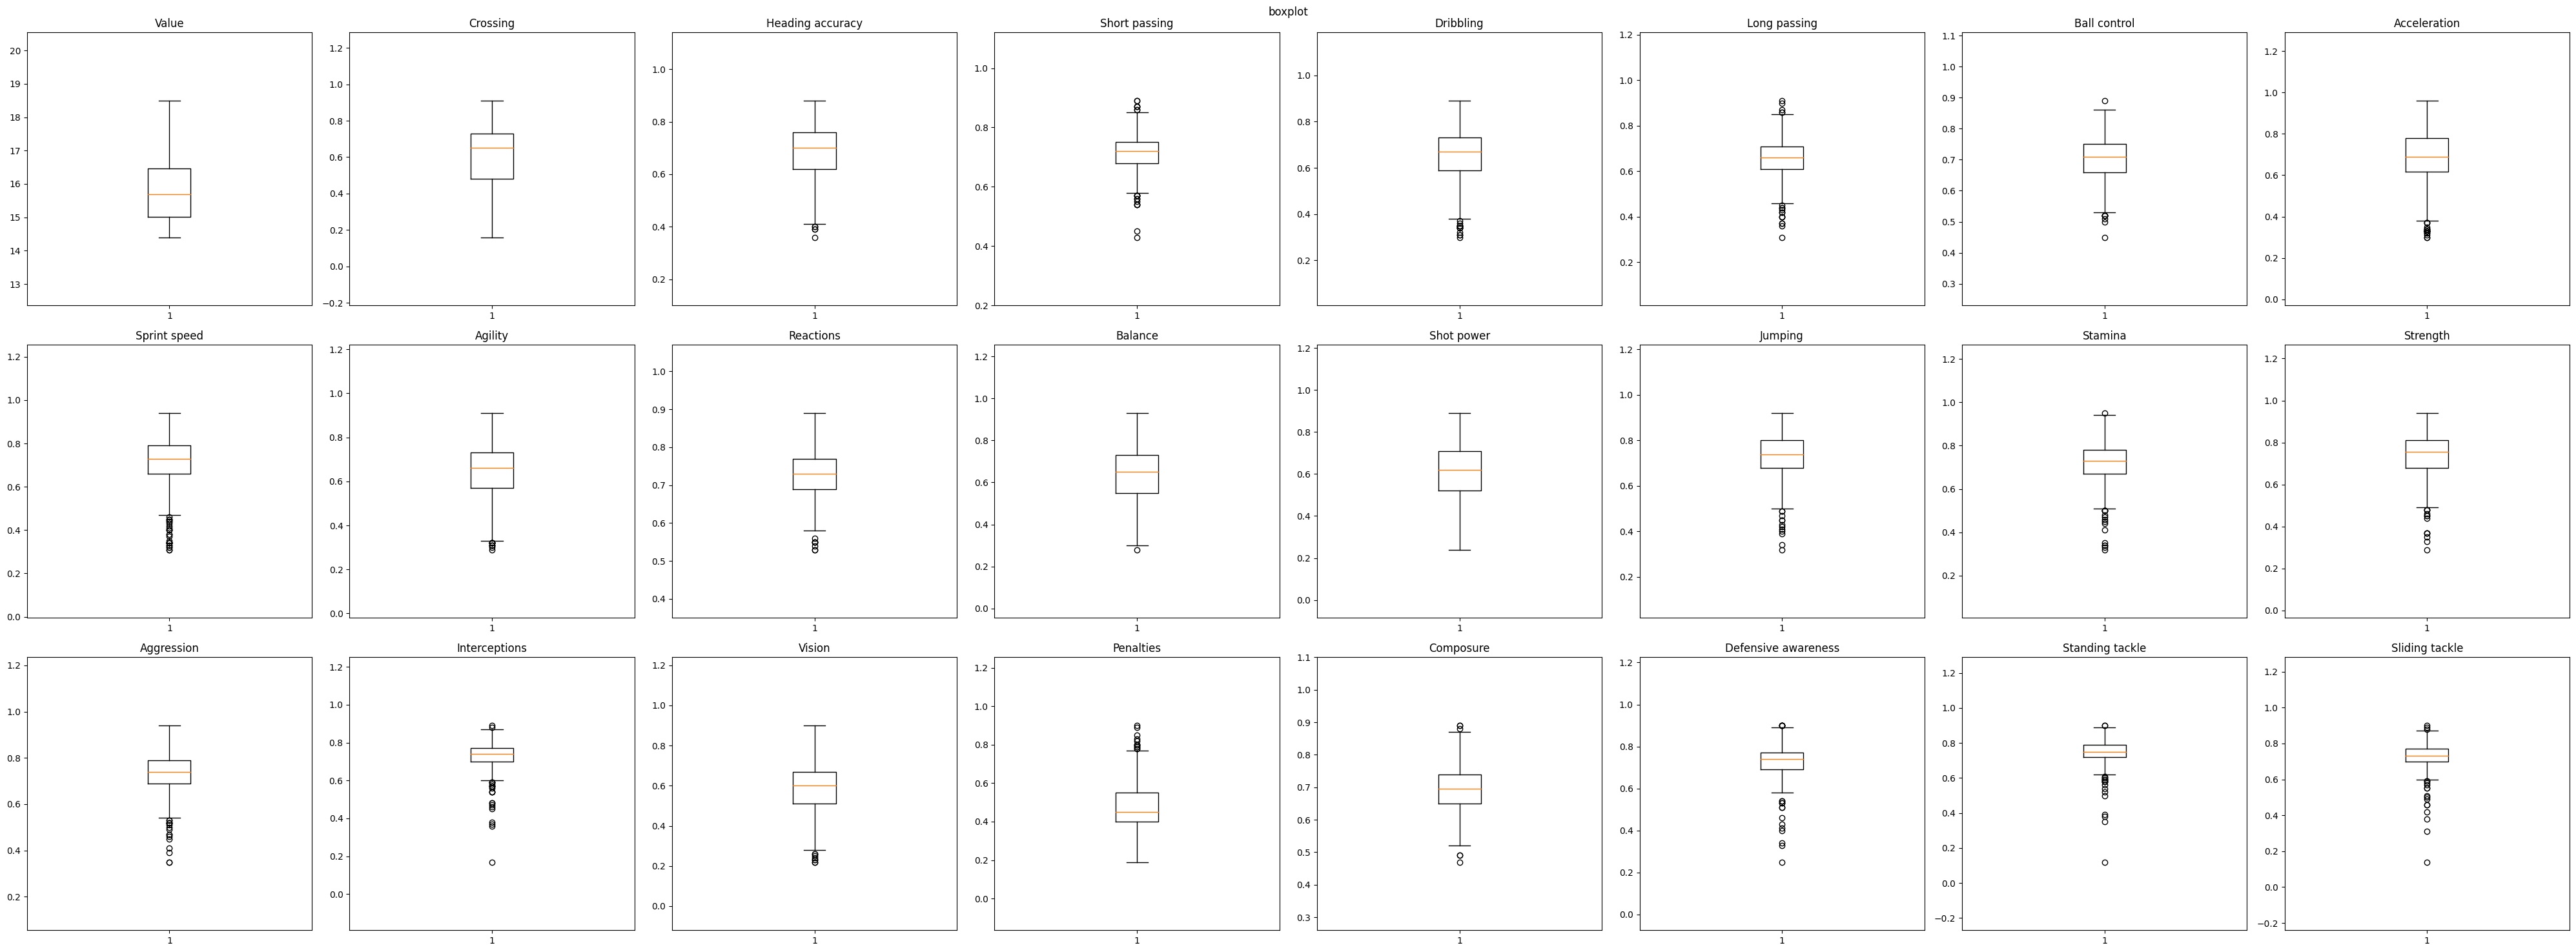

In [ ]:
plot_boxplot(numeric_columns, "boxplot", 8)

In [ ]:
for column in df.columns:
  outliers(df, column)

Lower fence is = 12.841730734722471
Higher fence is = 18.622270179293768
Applied to 0 row(s) of Value column
Lower fence is = 0.10499999999999998
Higher fence is = 1.105
Applied to 0 row(s) of Crossing column
Lower fence is = 0.41
Higher fence is = 0.97
Applied to 5 row(s) of Heading accuracy column
Lower fence is = 0.5750000000000002
Higher fence is = 0.855
Applied to 19 row(s) of Short passing column
Lower fence is = 0.37999999999999995
Higher fence is = 0.94
Applied to 14 row(s) of Dribbling column
Lower fence is = 0.46
Higher fence is = 0.8599999999999999
Applied to 18 row(s) of Long passing column
Lower fence is = 0.5250000000000001
Higher fence is = 0.885
Applied to 9 row(s) of Ball control column
Lower fence is = 0.3737499999999998
Higher fence is = 1.0237500000000002
Applied to 19 row(s) of Acceleration column
Lower fence is = 0.465
Higher fence is = 0.9850000000000001
Applied to 28 row(s) of Sprint speed column
Lower fence is = 0.3299999999999999
Higher fence is = 0.97
Applied

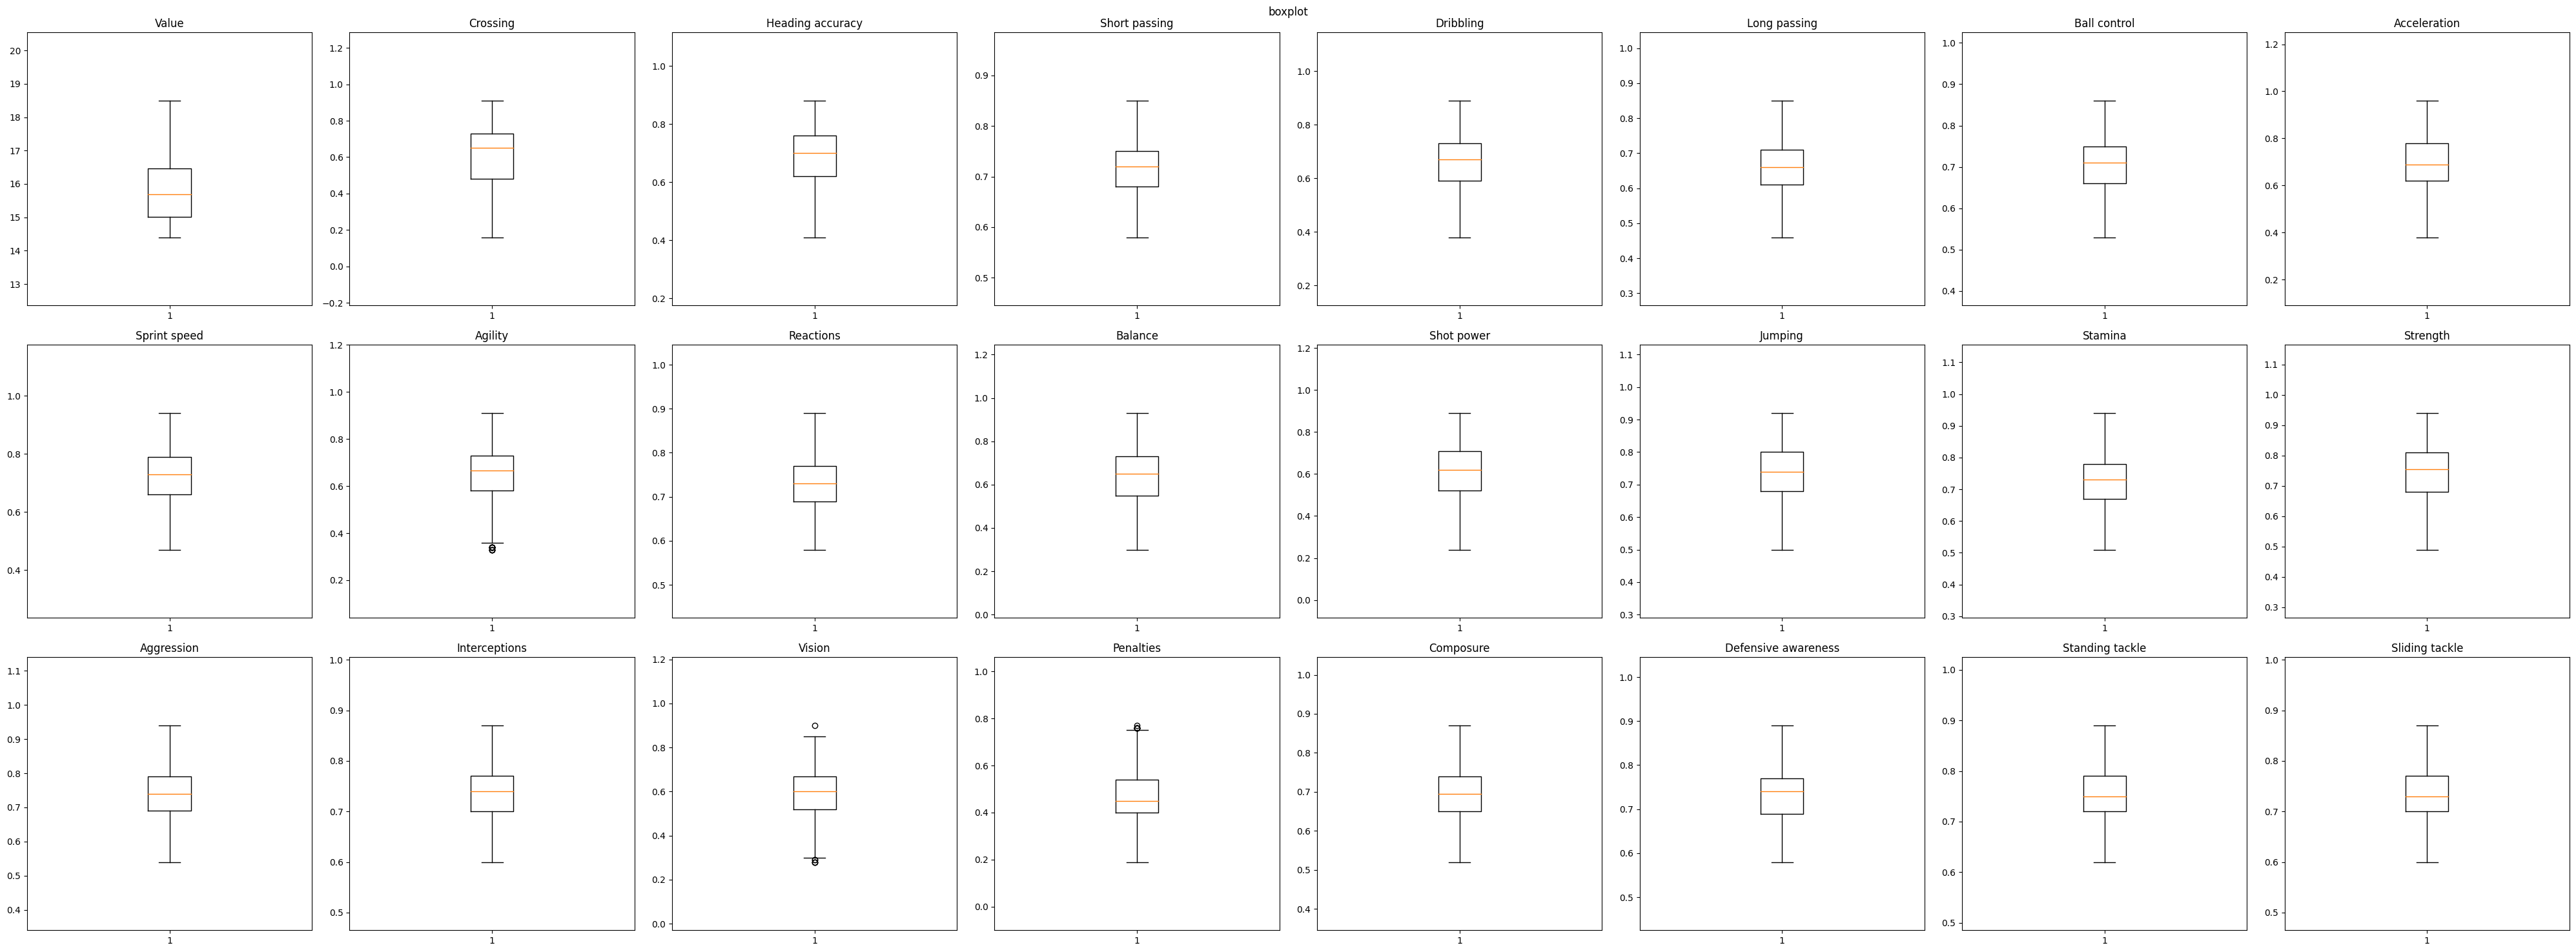

In [ ]:
plot_boxplot(numeric_columns, "boxplot", 8)

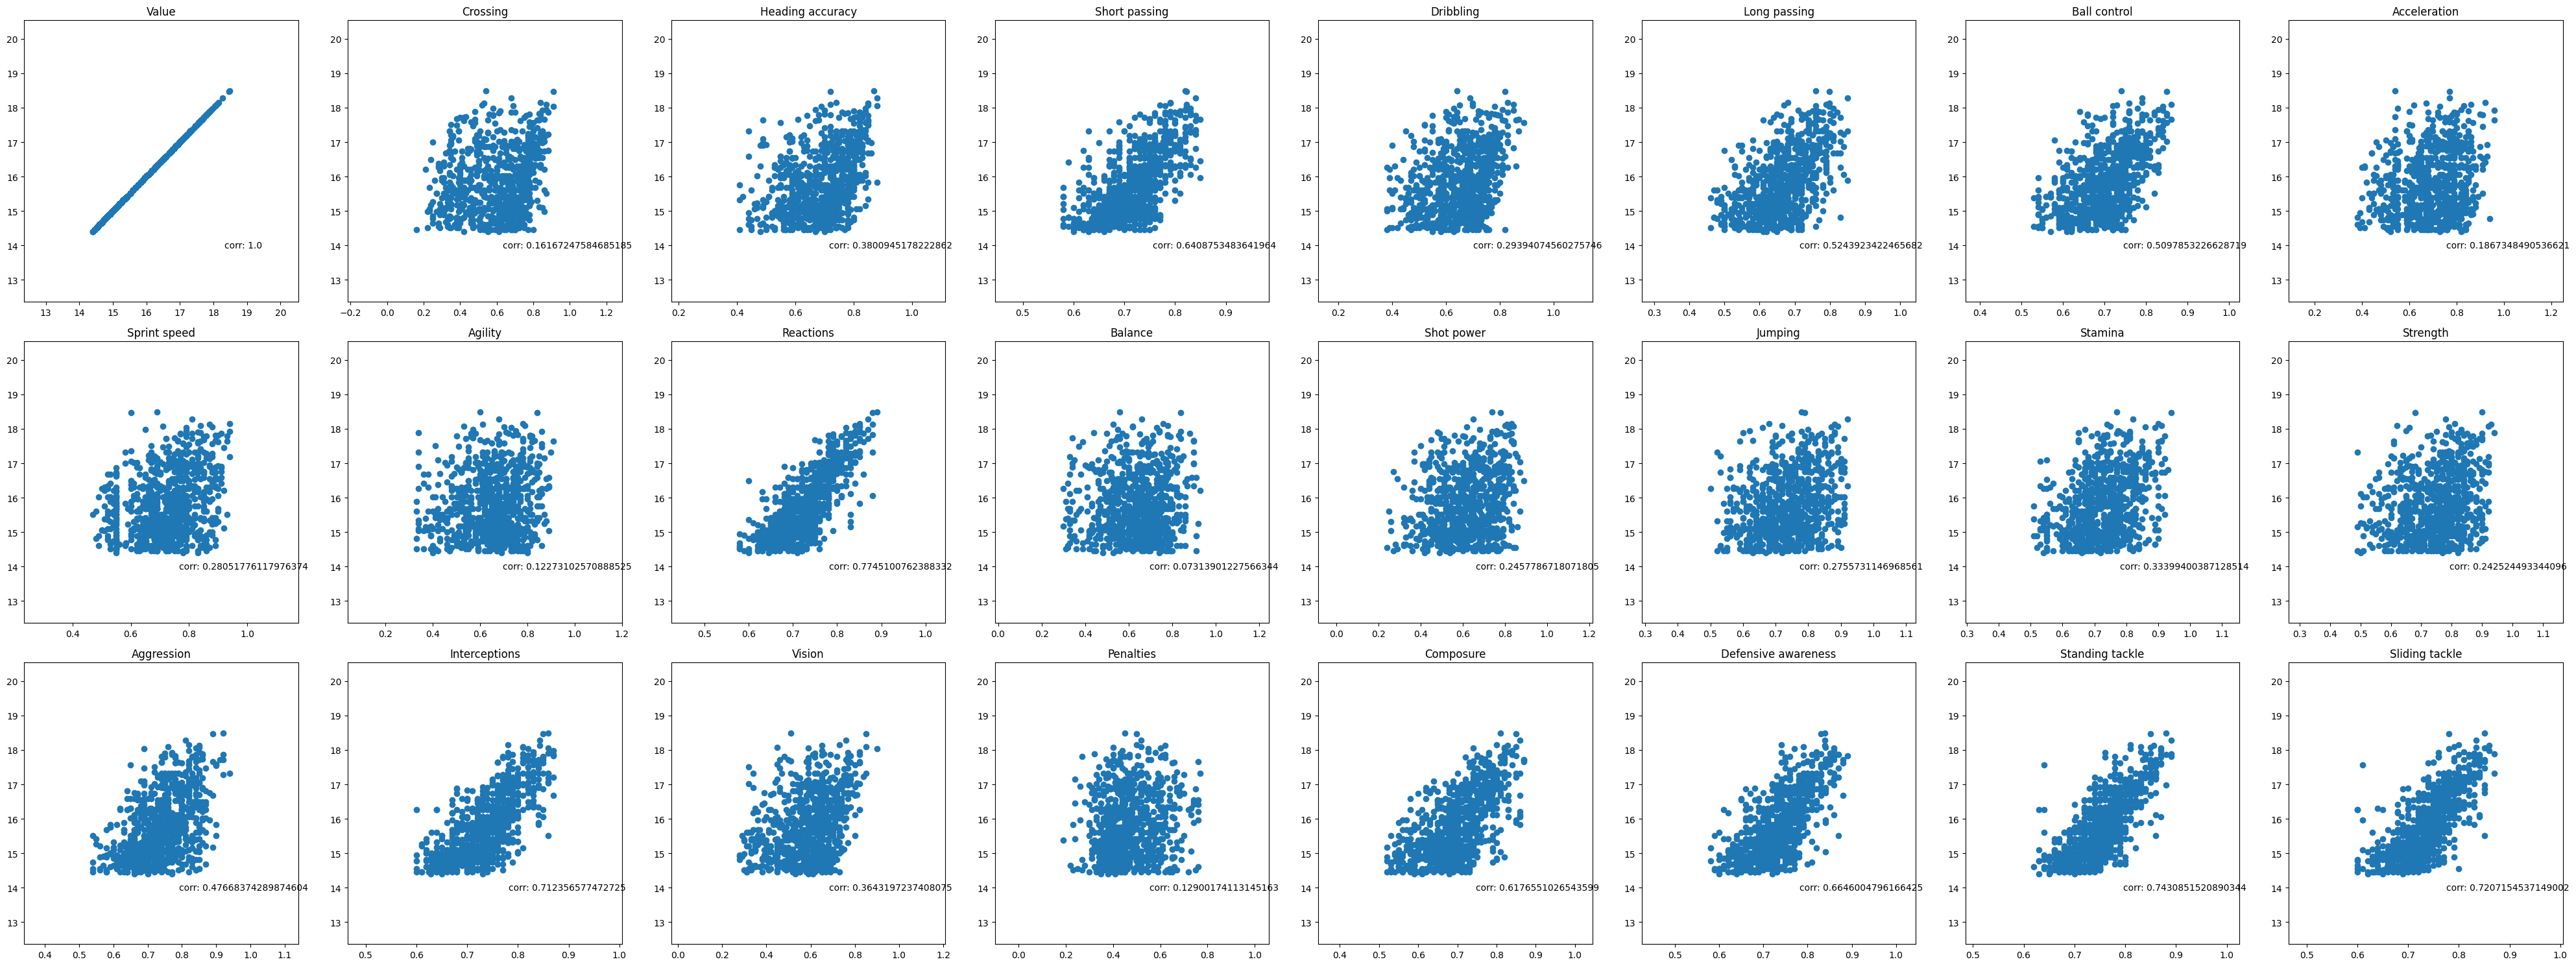

In [ ]:
scatterPlotToTarget(numeric_columns, target='Value', ncolumns=8)

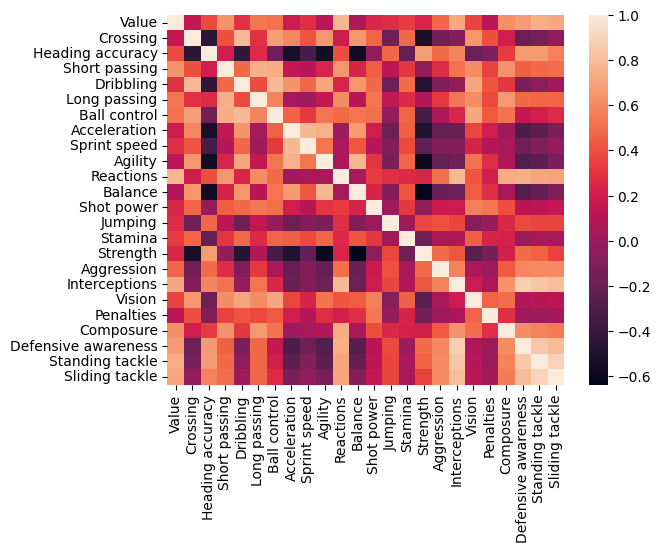

In [ ]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)
plt.show()

In [ ]:
correlation_matrix

,Value,Crossing,Heading accuracy,Short passing,Dribbling,Long passing,Ball control,Acceleration,Sprint speed,Agility,Reactions,Balance,Shot power,Jumping,Stamina,Strength,Aggression,Interceptions,Vision,Penalties,Composure,Defensive awareness,Standing tackle,Sliding tackle
Value,1.000000,0.161672,0.380095,0.640875,0.293941,0.524392,0.509785,0.186735,0.280518,0.122731,0.774510,0.073139,0.245779,0.275573,0.333994,0.242524,0.476684,0.712357,0.364320,0.129002,0.617655,0.664600,0.743085,0.720715
Crossing,0.161672,1.000000,-0.442977,0.399587,0.786504,0.294464,0.677820,0.593730,0.415849,0.652268,0.187886,0.645658,0.467945,-0.180503,0.475885,-0.524704,-0.150455,-0.092693,0.647804,0.401787,0.196553,-0.186791,-0.141581,-0.037953
Heading accuracy,0.380095,-0.442977,1.000000,0.200043,-0.423169,0.269091,-0.158534,-0.534870,-0.331425,-0.556590,0.398139,-0.565213,-0.029835,0.473137,-0.210156,0.673404,0.493317,0.590445,-0.184563,-0.108707,0.331985,0.662868,0.661103,0.568216
Short passing,0.640875,0.399587,0.200043,1.000000,0.487251,0.747315,0.737413,0.143818,0.101011,0.240006,0.652036,0.233846,0.445248,0.125142,0.312341,-0.029588,0.271141,0.517048,0.615661,0.356212,0.632877,0.456213,0.484103,0.500274
Dribbling,0.293941,0.786504,-0.423169,0.487251,1.000000,0.386219,0.787144,0.638852,0.476652,0.707242,0.244827,0.644341,0.488257,-0.176875,0.493270,-0.477291,-0.112374,-0.025433,0.708515,0.415283,0.316085,-0.129663,-0.062967,0.014054
Long passing,0.524392,0.294464,0.269091,0.747315,0.386219,1.000000,0.579730,0.037400,0.003185,0.159181,0.613065,0.111780,0.525839,0.139486,0.262648,0.080993,0.322750,0.525724,0.610086,0.373515,0.660604,0.485049,0.473183,0.473063
Ball control,0.509785,0.677820,-0.158534,0.737413,0.787144,0.579730,1.000000,0.459113,0.323449,0.524677,0.488843,0.521092,0.503035,-0.017950,0.464276,-0.329908,0.060525,0.250517,0.717211,0.432069,0.515631,0.161281,0.210203,0.265204
Acceleration,0.186735,0.593730,-0.534870,0.143818,0.638852,0.037400,0.459113,1.000000,0.782307,0.751198,0.012559,0.665425,0.202741,-0.182451,0.454652,-0.497272,-0.207732,-0.202085,0.367607,0.199098,0.002947,-0.310603,-0.245425,-0.143669
Sprint speed,0.280518,0.415849,-0.331425,0.101011,0.476652,0.003185,0.323449,0.782307,1.000000,0.527606,0.055692,0.422431,0.108443,-0.100528,0.375431,-0.224973,-0.099735,-0.095233,0.237579,0.091598,0.045743,-0.183052,-0.098049,-0.031340
Agility,0.122731,0.652268,-0.556590,0.240006,0.707242,0.159181,0.524677,0.751198,0.527606,1.000000,0.051248,0.782454,0.303245,-0.121251,0.474074,-0.592356,-0.205520,-0.178611,0.514615,0.281809,0.084873,-0.289953,-0.242290,-0.127360


In [ ]:
from sklearn.model_selection import train_test_split

y = df['Value']
X = df.drop(['Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate

models = {
    'linear_regression': LinearRegression(),
    'mlp_model': MLPRegressor((50, 50), activation='relu'),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}
reg_linear_models = {
    'ridge_regression': Ridge(),
    'lasso_regression': Lasso(),
}

for (model_name, model) in models.items():
  cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
  y_pred = [estimator.predict(X_test) for estimator in cv_results['estimator']]
  y_pred = np.average(y_pred, axis=0)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.31054425099126165
RMSE:  0.3883294167168237
r2 score:  0.8312778263120697

mlp_model
MAE:  0.36344606376144517
RMSE:  0.45566606695569023
r2 score:  0.7676915765462456

decision_tree
MAE:  0.3337780634664866
RMSE:  0.43231838077213264
r2 score:  0.7908879871602211

random_forest
MAE:  0.2984800649293603
RMSE:  0.3786339855791286
r2 score:  0.8395976351553176



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'ridge_regression': {'alpha': np.arange(0.01, 0.1, 0.01)},
    'lasso_regression': {'alpha': np.arange(0.0001, 0.001, 0.0001)}
}

for (model_name, model) in reg_linear_models.items():
  grid_search = GridSearchCV(model, param_grid[model_name], scoring='r2')
  grid_search.fit(X_train, y_train)
  reg_linear_models[model_name] = grid_search.best_estimator_
  reg_linear_models[model_name].fit(X_train, y_train)
  y_pred = reg_linear_models[model_name].predict(X_test)
  print(reg_linear_models[model_name])
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

Ridge(alpha=0.04)
MAE:  0.31026210697659573
RMSE:  0.3877968288792654
r2 score:  0.8317403086962931

Lasso(alpha=0.0007000000000000001)
MAE:  0.3178333376258377
RMSE:  0.3947919996984003
r2 score:  0.8256153445713479



In [ ]:
models['random_forest'].fit(X_train, y_train)
y_pred = models['random_forest'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,14.880221,15.251047
1,14.508658,14.843599
2,17.665658,17.497584
3,15.096444,15.336829
4,17.014184,16.085054
...,...,...
163,15.607270,15.322473
164,14.880221,14.833768
165,16.418200,16.151511
166,14.845130,15.219047


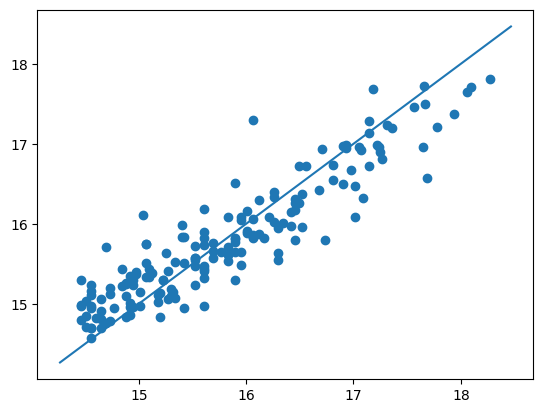

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot(plt.xlim(), plt.xlim())